In [1]:
# Install catalax
# !pip install catalax

# Generate Synthetic Dataset for Michaelis-Menten Kinetics

This notebook demonstrates how to create a synthetic dataset using Catalax for a simple Michaelis-Menten enzyme kinetics model. The workflow includes:

1. **Model Definition**: Create a simple enzyme kinetics model with one species (substrate) following Michaelis-Menten kinetics
2. **Parameter Setup**: Define kinetic parameters (v_max and K_m) 
3. **Dataset Generation**: Create multiple initial conditions with random variations
4. **Simulation**: Generate time-series data by simulating the model
5. **Visualization**: Plot the resulting concentration profiles
6. **Export**: Save the dataset in Croissant format for sharing and reuse

This synthetic data can be used for testing parameter estimation algorithms, model validation, or as training data for machine learning approaches.


In [ ]:
import warnings

import numpy as np

import catalax as ctx

warnings.filterwarnings("ignore")

In [3]:
# Initialize the model
model = ctx.Model(name="Simple menten model")

# Add species
model.add_species("s1")

# Add ODEs
model.add_ode("s1", "- (v_max * s1) / ( K_m + s1)")

# Prepare the model for bayes and define priors
model.parameters.v_max.value = 7.0
model.parameters.K_m.value = 100.0

model

,name,symbol
0,s1,s1


,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound,hdi
0,K_m,K_m,100.0,False,None,None,None,None,None
1,v_max,v_max,7.0,False,None,None,None,None,None


""


""



Model(
    name='Simple menten model',
    odes=DottedDict({'s1': ODE(equation=-s1*v_max/(K_m + s1), parameters=DottedDict({'K_m': Parameter(name='K_m', symbol=K_m, value=100.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, hdi=None, prior=None), 'v_max': Parameter(name='v_max', symbol=v_max, value=7.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, hdi=None, prior=None)}), species=Species(name='s1', symbol=s1), observable=True)}),
    species=,
    parameters=,
    constants=,
    assignments=
)

In [4]:
# Apply model species to a dataset
dataset = ctx.Dataset.from_model(model)

# Add initial conditions
n_ds = 30
for _ in range(n_ds):
    dataset.add_initial(s1=np.random.normal(300.0, 8.0))
    dataset.add_initial(s1=np.random.normal(200.0, 8.0))
    dataset.add_initial(s1=np.random.normal(80.0, 8.0))
    dataset.add_initial(s1=np.random.normal(50.0, 8.0))

In [5]:
# Simulate the model
config = ctx.SimulationConfig(nsteps=20, t0=0, t1=100)
dataset = model.simulate(dataset=dataset, config=config)

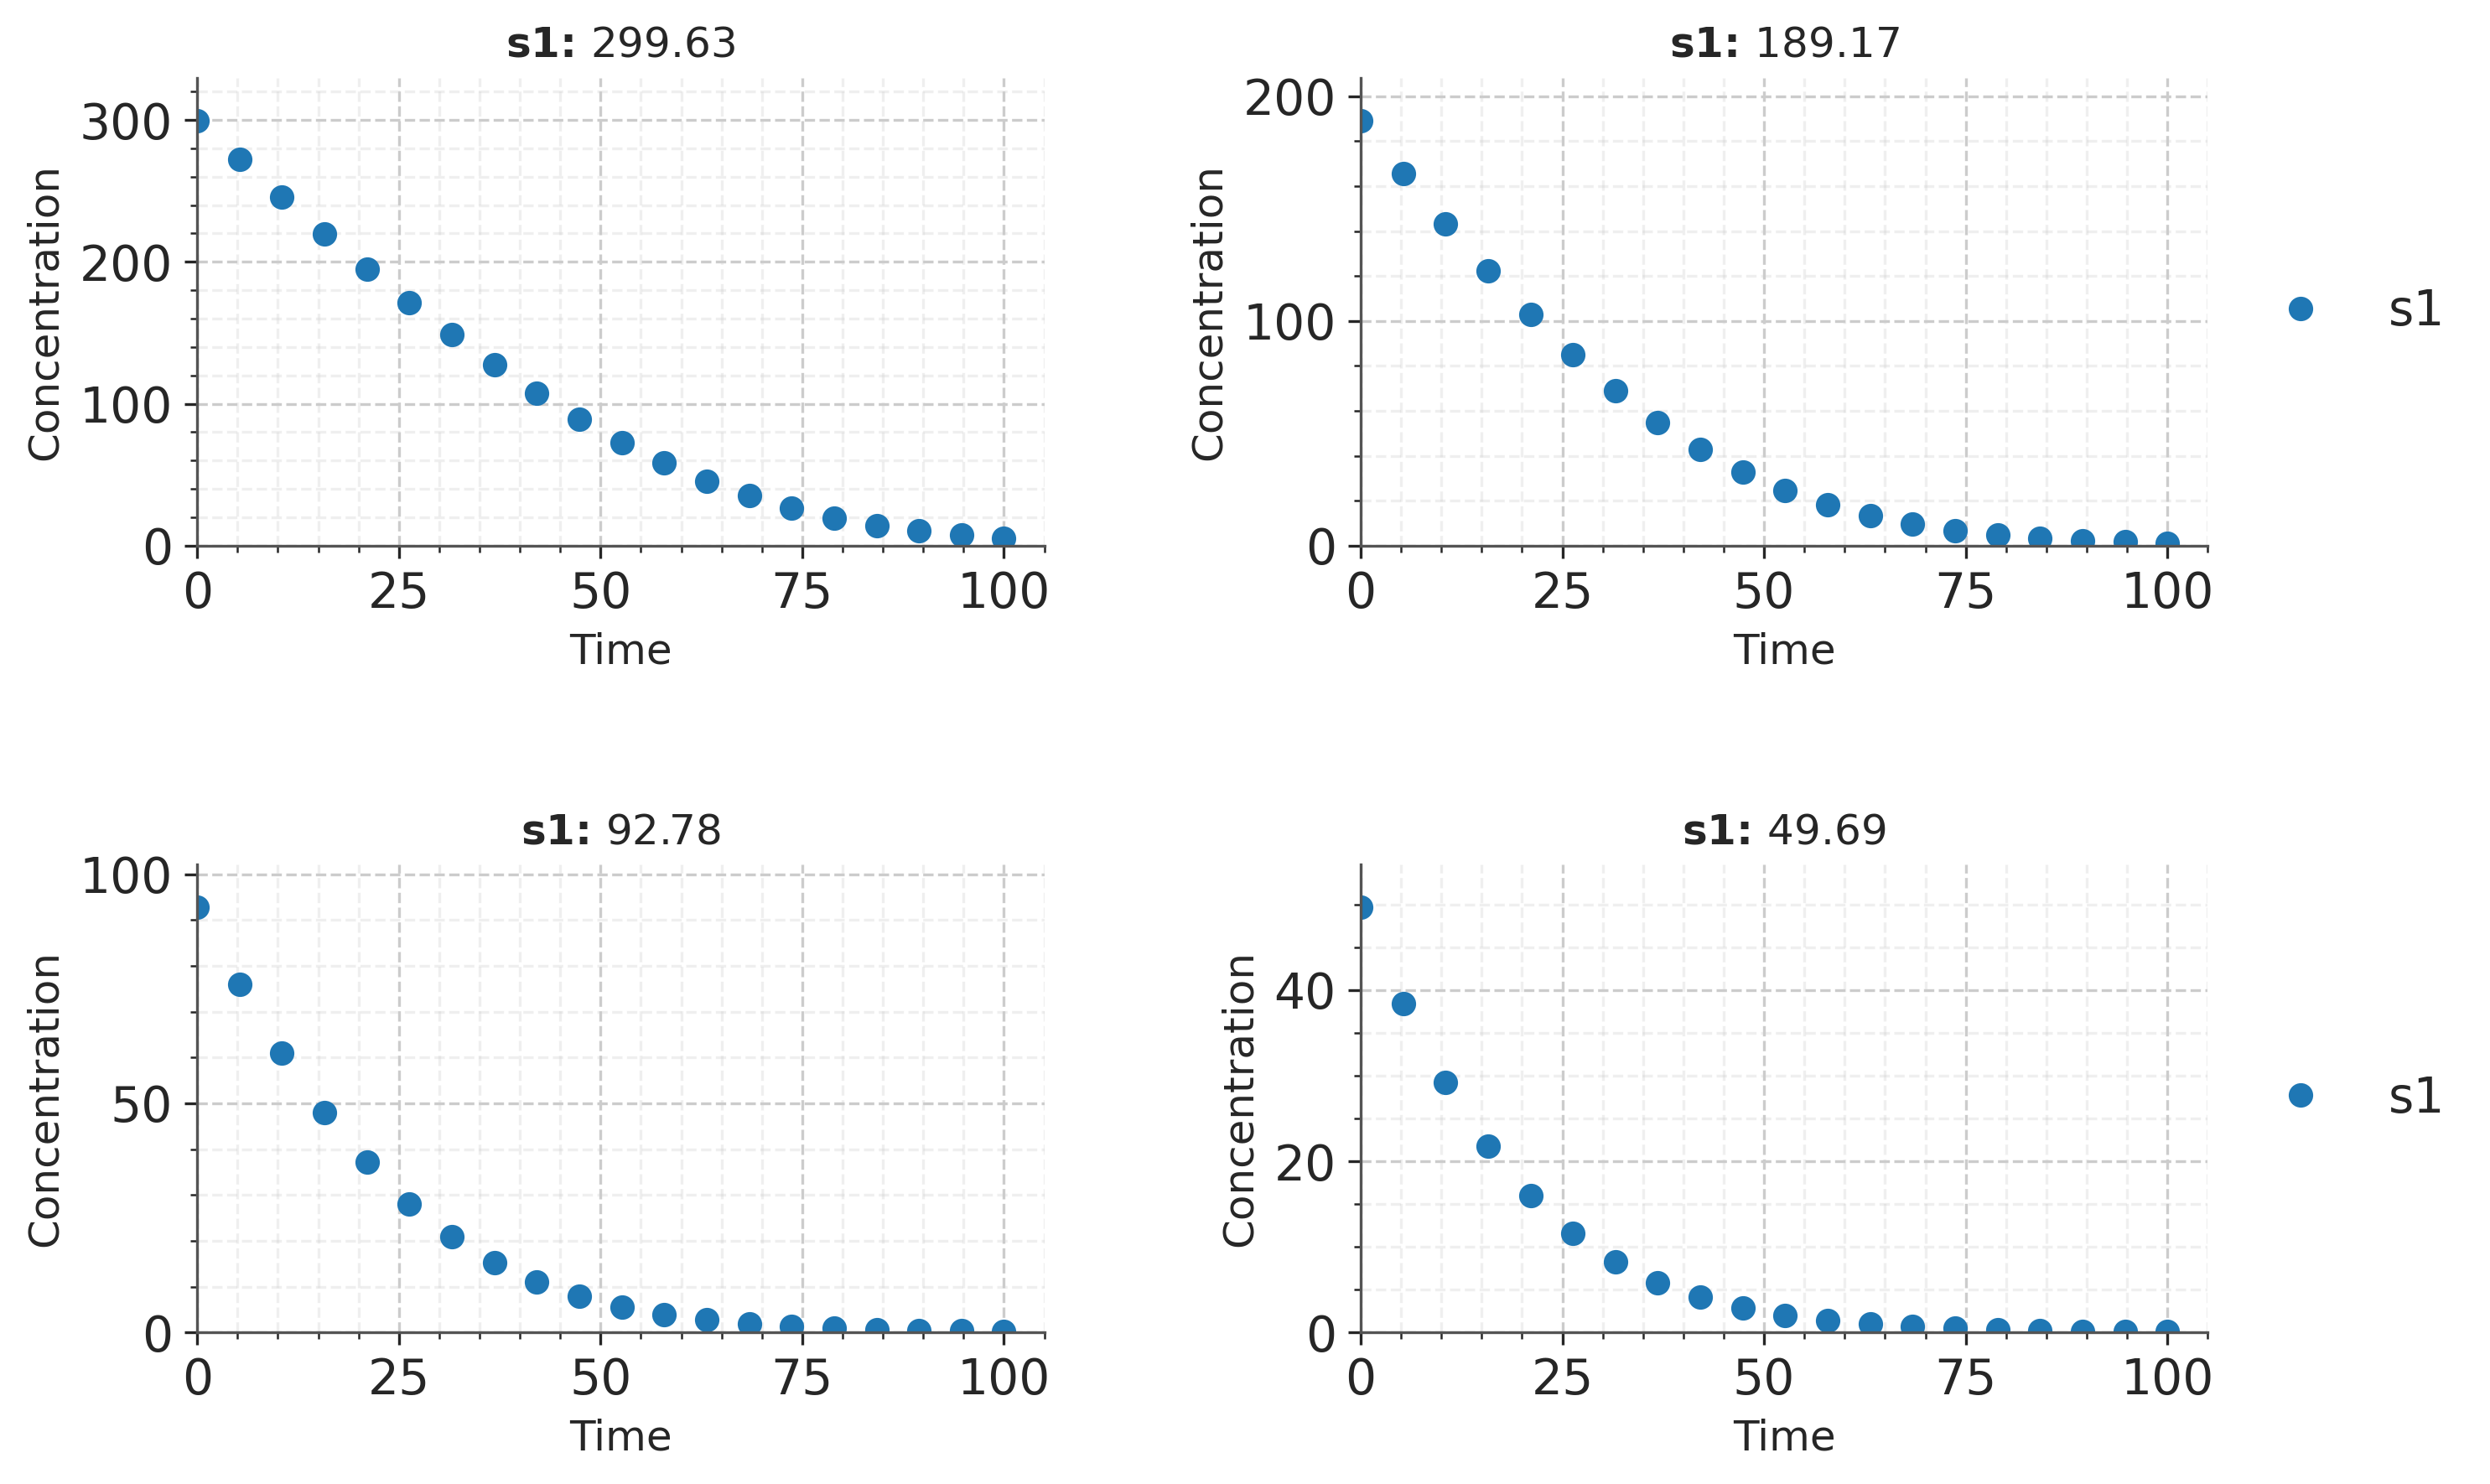

In [6]:
# Plot the first 4 simulations
f = dataset.plot(
    measurement_ids=[
        dataset.measurements[0].id,
        dataset.measurements[1].id,
        dataset.measurements[2].id,
        dataset.measurements[3].id,
    ]
)

In [7]:
# Save the datasets
dataset.to_croissant("datasets", name="croissant_dataset", cite_as="cite me!")

🥐 Dataset exported to Croissant archive at datasets/croissant_dataset.zip